## Feedback Prize - English Language Learning

Bu yarışmanın amacı, 8. ile 12. sınıf düzeyindeki İngilizce Dil Öğrenicilerinin (ELL'ler) dil yeterliliklerini değerlendirmektir. ELL'lerin yazdığı denemelerden oluşan bir veri seti kullanarak, daha iyi destek sağlayan yeterlilik modellerinin geliştirilmesi hedeflenmektedir. Öğrencilerin İngilizce dil gelişimini daha doğru bir şekilde değerlendirmek ve öğretmenlerin not verme sürecini hızlandırmak için bu çalışmanın sonuçları büyük önem taşımaktadır. Böylece, ELL'ler, dil yeterliliklerine uygun öğrenme görevleri alarak İngilizce becerilerini geliştirme fırsatı bulacaklardır.

Bu yarışma, Vanderbilt Üniversitesi ve The Learning Agency Lab tarafından desteklenen bir girişimdir. Yarışmaya katılan veri bilimciler, makine öğrenimi, doğal dil işleme ve eğitim verisi analitiği gibi becerilerini kullanarak ELL'leri desteklemek için otomatik geri bildirim araçlarını geliştirme fırsatı bulacaklardır. Bu araçların ELL'lerin mevcut dil seviyeleri bağlamında çalışmalarının değerlendirilmesine olanak tanıyarak öğretmenlerin not verme yükünü hafifletmesi ve öğrencilerin daha uygun öğrenme görevleri almasını sağlaması beklenmektedir.

Vanderbilt Üniversitesi ve The Learning Agency Lab, Bill & Melinda Gates Vakfı, Schmidt Futures ve Chan Zuckerberg Initiative gibi kuruluşların desteğiyle bu çalışmanın gerçekleştirilmesine olanak tanımıştır.

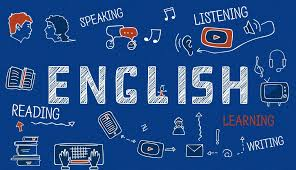 

<a href='https://www.kaggle.com/competitions/feedback-prize-english-language-learning' target=_blank>Yarışmayı burada bulabilirsiniz</a>

In [43]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cloudd/cloud.png
/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


## Kütüphaneleri Yükleme

In [44]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [45]:
train=pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/train.csv')
test=pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/test.csv')
#Dosyaları okuyoruz.

## EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [46]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [47]:
test.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [48]:
train.shape, test.shape

((3911, 8), (3, 2))

In [49]:
train.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [50]:
test.isnull().sum()

text_id      0
full_text    0
dtype: int64

In [51]:
train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [52]:
train.corr(numeric_only=True)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


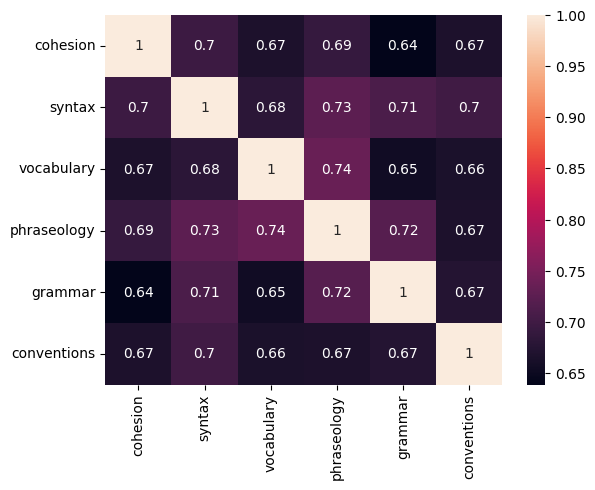

In [53]:
sns.heatmap(train.corr(numeric_only=True), annot=True);

In [54]:
train.drop('text_id', axis=1, inplace=True)

In [55]:
from textblob import TextBlob

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
train['full_text']=train['full_text'].str.lower()
train['full_text']=train['full_text'].str.replace('[^\w\s]','',regex=True)
train['full_text']=train['full_text'].str.replace('\d+','',regex=True)
train['full_text']=train['full_text'].str.replace('\n','',regex=True)
train['full_text']=train['full_text'].str.replace('\r','',regex=True)

## WordCloud Oluşturma

In [58]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('/kaggle/input/cloudd/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

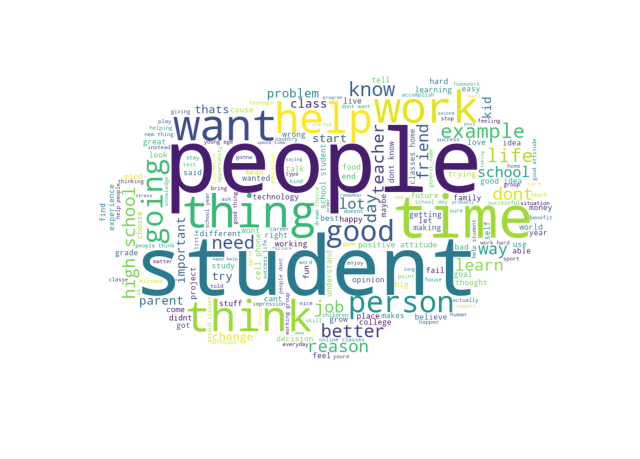

In [89]:
wc(train['full_text'],'white')

#Style cloud burada hata verdi.O yüzden kullanmadım.

In [65]:
#pip install neattext

In [64]:
import neattext.functions as nfx

In [66]:
all=' '.join(train['full_text'].tolist())
all1=' '.join(test['full_text'].tolist())

In [67]:
s1=nfx.remove_stopwords(all)
s2=nfx.remove_stopwords(all1)

In [68]:
from collections import Counter

In [69]:
#print(Counter(s1.split()))

In [70]:
data=Counter(s1.split()).most_common(30)
data=dict(data)

In [71]:
data

{'people': 14515,
 'students': 12879,
 'school': 12333,
 'good': 8348,
 'time': 8243,
 'like': 7944,
 'work': 7826,
 'want': 7158,
 'help': 6716,
 'life': 6558,
 'dont': 6318,
 'think': 6131,
 'know': 4845,
 'need': 4826,
 'going': 4545,
 'things': 4475,
 'better': 4367,
 'person': 4260,
 'example': 3903,
 'learn': 3643,
 'student': 3629,
 'way': 3616,
 'classes': 3256,
 'day': 3213,
 'lot': 2997,
 'thing': 2862,
 'class': 2834,
 'home': 2827,
 'bad': 2684,
 'new': 2581}

In [72]:
data1=Counter(s2.split()).most_common(30)
data1=dict(data1)

In [73]:
train['full_text']=train['full_text'].apply(lambda x: nfx.clean_text(x))
test['full_text']=test['full_text'].apply(lambda x: nfx.clean_text(x))

In [74]:
train['full_text']=train['full_text'].apply(lambda x: nfx.normalize(x))
test['full_text']=test['full_text'].apply(lambda x: nfx.normalize(x))

In [75]:
train['full_text'][1]

'problem change let best matter happening change mind need wake look problems best way change want change time ago aproblem change different help understand tings wokfirst different example remember came united states think going change think going change different country realist wrong problem change change way remember shy think change lot problems think thing life need different way dont let happened ruing change want problem example think going change dont need shy anymore need start seeing different ways mad need know going happened afterpeople different way know change best dont let body change way want change cant choice problems decide itsecond help understand things work instance mom lot problems faith people mom scare high im scare high understand mos scare high scare high time mom airplane laugh scare funny different way like high understand hoe things work people example think mom different understand like high need understand help understand things work need start things w

In [77]:
test['full_text'][1]

'think students benefit able attend classes home? yes! benefit student attend classes home. student want attend classes home thinks important . think learned fast, understand student attend classes school. example friend told attand classes home good her, subject understand attend classes school attend home classes good subject. like science think science important understand science understand science attend classes home. parent want children attend classes school, christian want children attend classes school believe science want children disrespectful teacher them. maybe student deciding attend classes home benefit good people lot money. people attend classes home. student attend classes home hate bull trouble. student come school bull student fight other. know people scared fight bull someone. example girl attend day school girl bull beat everyday try kill self think fight parent sigh want kill herself, immediately stop her, let children school think school like school. attand clas

In [79]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [81]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [82]:
train['full_text']=train['full_text'].apply(lambda x: nfx.remove_stopwords(x))
test['full_text']=test['full_text'].apply(lambda x: nfx.remove_stopwords(x))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [84]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [85]:
train.shape

(3911, 7)

In [86]:
train.head()

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,think students benefit learning homebecause wo...,3.5,3.5,3.0,3.0,4.0,3.0
1,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5
2,dear principalif u change school policy grade ...,3.0,3.5,3.0,3.0,3.0,2.5
3,best time life agree greatest accomplishment w...,4.5,4.5,4.5,4.5,4.0,5.0
4,small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5


## Modelleme

In [92]:
x_train=vect.fit_transform(train['full_text'])
x_test=vect.transform(test['full_text'])

In [93]:
train.drop('full_text', axis=1 ,inplace=True)

In [94]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 296174 stored elements and shape (3911, 10000)>

In [104]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = MultiOutputRegressor(LinearRegression())

model.fit(x_train, train)
pred_train = model.predict(x_train)

In [105]:
rmse = mean_squared_error(train, pred_train) ** 0.5
r2 = r2_score(train, pred_train)


print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 0.0017647177456181406
R2 Score: 0.9999927550770141


In [106]:
# Test veri setinde tahmin yapma
pred_test = model.predict(x_test)

In [107]:
# Sonuçları DataFrame'e çevirme
pred_df = pd.DataFrame(pred_test, columns=['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'])

In [109]:
pred_df.insert(0, 'text_id', test['text_id'])  

# Kaggle için gönderim dosyasını oluşturma
pred_df.to_csv('submission_ell.csv', index=False)

In [110]:
pred_df.head()

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.825011,2.387837,2.942800,1.772737,1.826738,2.616136
1,000BAD50D026,2.364608,2.541493,2.420433,2.119588,2.278095,3.243927
2,00367BB2546B,2.778455,3.225427,2.945941,2.764871,3.682219,2.850762


## Özet

Bu projede, İngilizce Dil Öğrenicilerinin (ELL'ler) yazılı metinleri üzerinde çalışarak dil yeterliliklerini değerlendirmek amacıyla çeşitli adımlar izledik. İlk olarak, veri setimizi okuyarak başladık. Ardından, metin verilerindeki noktalama işaretlerini kaldırdık.Daha sonra neattext kütüphanesini kullandık.Stopwordsleri kaldırdık.

Sonrasında, metin verilerinden görsel bir temsil oluşturmak için bir kelime bulutu (word cloud) oluşturduk. Bu aşama, metinlerdeki en sık kullanılan kelimeleri ve ifadeleri görselleştirerek dil kullanımını anlamamıza yardımcı oldu.

Metin verilerini hazırladıktan sonra, fit_transform yöntemi ile verilerimizi vektörleştirdik ve bu vektörleri kullanarak modelimizi eğittik. Model eğitimi tamamlandıktan sonra, test verimizi kullanarak tahminler yaptık. Bu süreç, ELL'lerin dil gelişimini daha iyi değerlendirmek için önemli bir adım oldu.

Sonuç olarak, bu çalışma, yazılı dil becerilerini ölçmek ve geliştirmek için veri bilimi teknikleri kullanarak ELL'lere daha iyi destek sağlamayı hedeflemektedir.

(Tahmin ettiğimiz dosyayı yükleme kısmı açık değildi.Bu yüzden yüklemedik.)